In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Librerías importadas exitosamente")
print("Configuración de gráficos establecida")

Librerías importadas exitosamente
Configuración de gráficos establecida


In [ ]:
# Instalar NetworkX si no está disponible
try:
    import networkx as nx
    print(" NetworkX ya está instalado")
except ImportError:
    print(" Instalando NetworkX...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "networkx"])
    import networkx as nx
    print(" NetworkX instalado correctamente")

📦 Instalando NetworkX...
✅ NetworkX instalado correctamente
✅ NetworkX instalado correctamente


In [ ]:

archivo_csv = r'c:\Users\crhac\CATSSP\AMPL\Results\comparacion_solvers_20250625_215210.csv'

try:
    df = pd.read_csv(archivo_csv)
    print(f" Archivo cargado exitosamente")
    print(f" Ruta: {archivo_csv}")
    print(f" Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
    
except FileNotFoundError:
    print(f" Error: No se encontró el archivo en {archivo_csv}")
    print(" Verificar la ruta del archivo")
    
except Exception as e:
    print(f" Error al cargar: {e}")


print("\n" + "="*60)
print("INFORMACIÓN DEL DATASET")
print("="*60)
print(f"Columnas disponibles: {list(df.columns)}")
print(f"\nPrimeras 5 filas:")
print(df.head())

✅ Archivo cargado exitosamente
📁 Ruta: c:\Users\crhac\CATSSP\AMPL\Results\comparacion_solvers_20250625_215210.csv
📊 Dimensiones: 36 filas x 12 columnas

INFORMACIÓN DEL DATASET
Columnas disponibles: ['solver', 'estado', 'costo', 'tiempo', 'arcos', 'num_arcos', 'error', 'archivo', 'archivo_corregido', 'start_node', 'end_node', 'timestamp']

Primeras 5 filas:
   solver   estado   costo    tiempo                             arcos  \
0  gurobi   solved   810.0  0.195613          [(0, 2), (1, 3), (2, 1)]   
1   highs   solved   810.0  0.155243          [(0, 2), (1, 3), (2, 1)]   
2   cplex  failure     0.0  0.001007                                []   
3  gurobi   solved  2008.0  0.210173  [(0, 1), (1, 2), (2, 3), (3, 4)]   
4   highs   solved  2008.0  0.163974  [(0, 1), (1, 2), (2, 3), (3, 4)]   

   num_arcos  error     archivo  archivo_corregido  start_node  end_node  \
0          3    NaN    data.dat               True           0         3   
1          3    NaN    data.dat            

🎨 Generando Gráfico 1: Tasa de Éxito por Solver


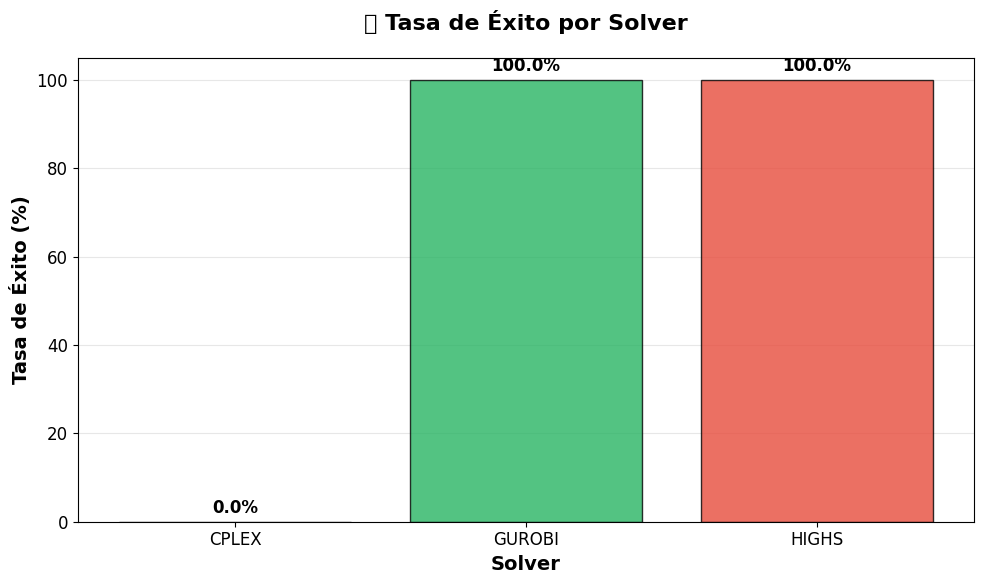

✅ Gráfico 1 completado


In [ ]:

print(" Generando Gráfico 1: Tasa de Éxito por Solver")


tasa_exito = df.groupby('solver').apply(
    lambda x: (x['estado'].isin(['solved', 'optimal']).sum() / len(x) * 100)
).round(1)


fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#2E86C1', '#28B463', '#E74C3C'] 
bars = ax.bar(tasa_exito.index, tasa_exito.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

ax.set_title(' Tasa de Éxito por Solver', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Solver', fontsize=14, fontweight='bold')
ax.set_ylabel('Tasa de Éxito (%)', fontsize=14, fontweight='bold')
ax.set_ylim(0, 105)

for bar, valor in zip(bars, tasa_exito.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,
            f'{valor:.1f}%', ha='center', va='bottom', 
            fontweight='bold', fontsize=12)

ax.grid(True, alpha=0.3, axis='y')
ax.set_axisbelow(True)


ax.set_xticklabels([solver.upper() for solver in tasa_exito.index])

plt.tight_layout()
plt.show()

print(f" Gráfico 1 completado")

In [ ]:

print(" Preparando datos...")

df_exitosos = df[df['estado'].isin(['solved', 'optimal'])].copy()
df_fallidos = df[df['estado'] == 'failure'].copy()

print(f" Datos preparados:")
print(f"  • Total ejecuciones: {len(df)}")
print(f"  • Exitosas: {len(df_exitosos)}")
print(f"  • Fallidas: {len(df_fallidos)}")
print(f"  • Solvers en datos exitosos: {list(df_exitosos['solver'].unique()) if len(df_exitosos) > 0 else 'Ninguno'}")

🔍 Preparando datos...
📊 Datos preparados:
  • Total ejecuciones: 36
  • Exitosas: 24
  • Fallidas: 12
  • Solvers en datos exitosos: ['gurobi', 'highs']


🎨 Generando Gráfico 2: Tiempos de Ejecución (Solo Soluciones Exitosas)


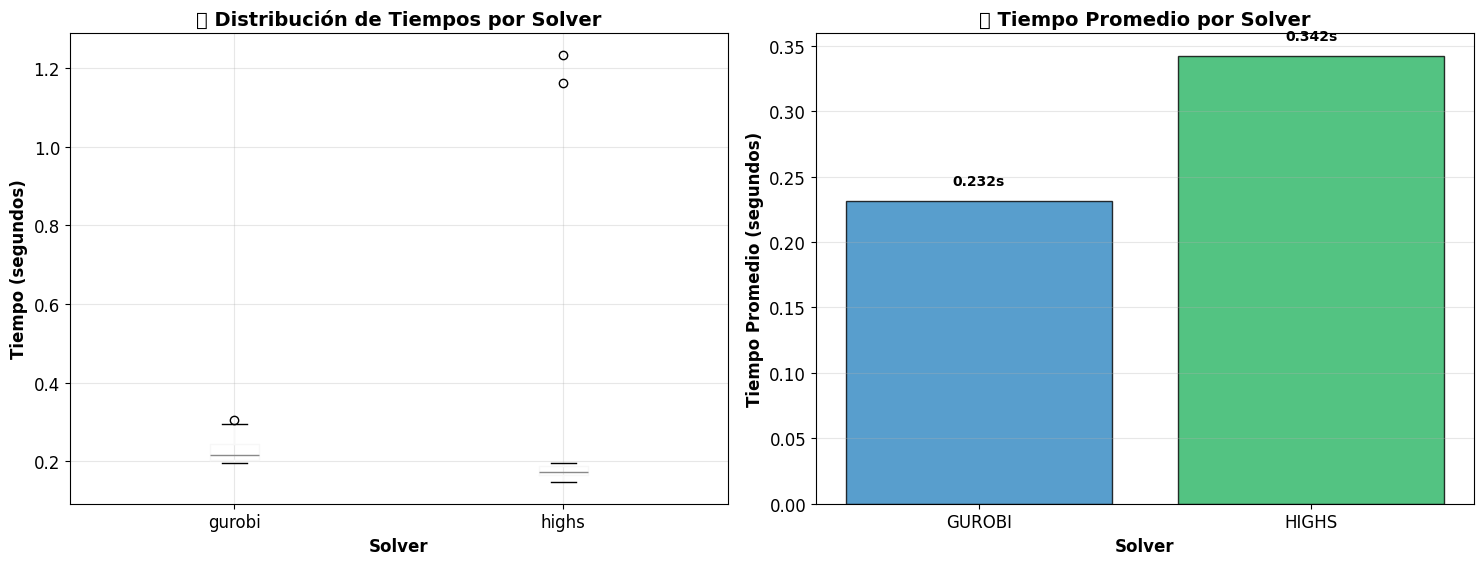

✅ Gráfico 2 completado

⏱️ ESTADÍSTICAS DE TIEMPO:
  • GUROBI:
    - Promedio: 0.2317s
    - Mínimo: 0.1956s
    - Máximo: 0.3059s
  • HIGHS:
    - Promedio: 0.3424s
    - Mínimo: 0.1469s
    - Máximo: 1.2335s


In [ ]:

print(" Generando Gráfico 2: Tiempos de Ejecución (Solo Soluciones Exitosas)")

if len(df_exitosos) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    df_exitosos.boxplot(column='tiempo', by='solver', ax=ax1)
    ax1.set_title(' Distribución de Tiempos por Solver', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Solver', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Tiempo (segundos)', fontsize=12, fontweight='bold')
    plt.suptitle('') 
    
    tiempo_promedio = df_exitosos.groupby('solver')['tiempo'].mean()
    
    bars2 = ax2.bar(tiempo_promedio.index, tiempo_promedio.values, 
                    color=['#2E86C1', '#28B463', '#E74C3C'], alpha=0.8, 
                    edgecolor='black', linewidth=1)
    
    ax2.set_title(' Tiempo Promedio por Solver', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Solver', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Tiempo Promedio (segundos)', fontsize=12, fontweight='bold')
    
    for bar, valor in zip(bars2, tiempo_promedio.values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 0.01,
                f'{valor:.3f}s', ha='center', va='bottom', 
                fontweight='bold', fontsize=10)

    ax2.set_xticklabels([solver.upper() for solver in tiempo_promedio.index])
    
    
    ax1.grid(True, alpha=0.3)
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print(f" Gráfico 2 completado")
    
  
    print(f"\n ESTADÍSTICAS DE TIEMPO:")
    for solver in df_exitosos['solver'].unique():
        datos = df_exitosos[df_exitosos['solver'] == solver]['tiempo']
        print(f"  • {solver.upper()}:")
        print(f"    - Promedio: {datos.mean():.4f}s")
        print(f"    - Mínimo: {datos.min():.4f}s")
        print(f"    - Máximo: {datos.max():.4f}s")
else:
    print(" No hay datos exitosos para mostrar tiempos")

🎨 Generando Gráfico 3: Costos por Instancia y Solver


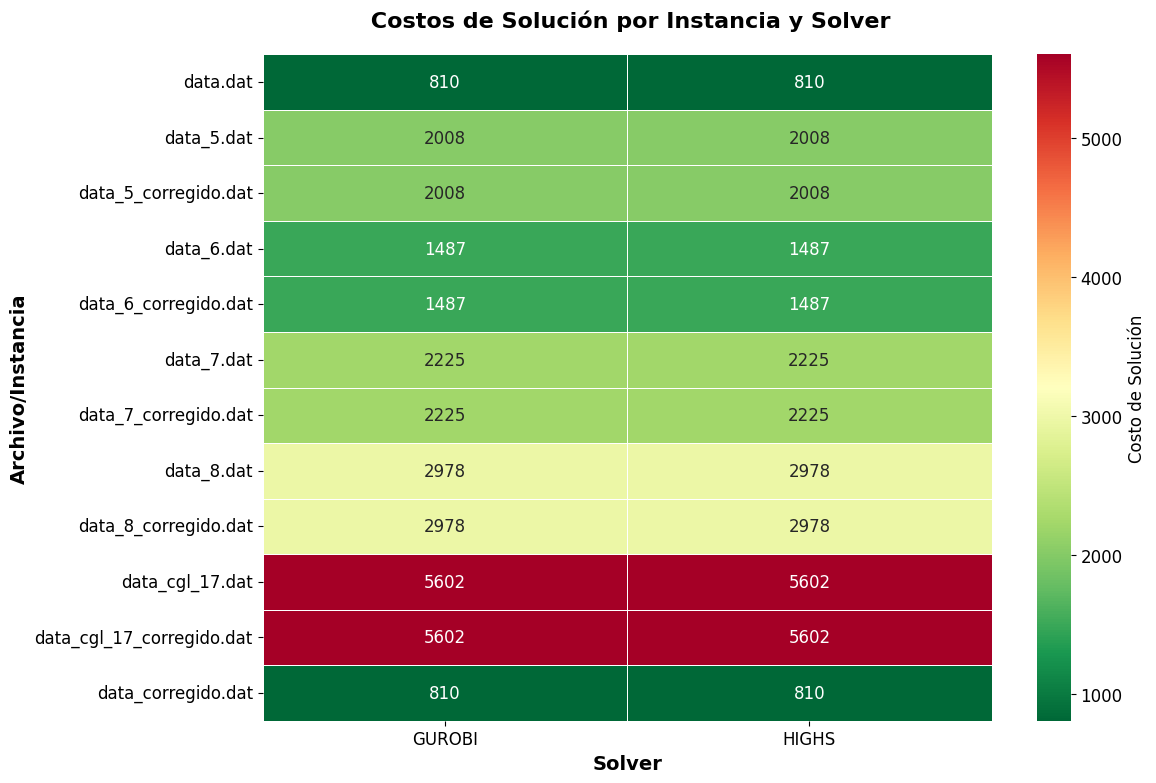

✅ Gráfico 3 completado

💰 ANÁLISIS DE COSTOS:

Costo promedio por solver:
  • GUROBI: 2518.33
  • HIGHS: 2518.33

Mejor solver por instancia (menor costo):
  • data.dat: GUROBI (Costo: 810)
  • data_5.dat: GUROBI (Costo: 2008)
  • data_5_corregido.dat: GUROBI (Costo: 2008)
  • data_6.dat: GUROBI (Costo: 1487)
  • data_6_corregido.dat: GUROBI (Costo: 1487)
  • data_7.dat: GUROBI (Costo: 2225)
  • data_7_corregido.dat: GUROBI (Costo: 2225)
  • data_8.dat: GUROBI (Costo: 2978)
  • data_8_corregido.dat: GUROBI (Costo: 2978)
  • data_cgl_17.dat: GUROBI (Costo: 5602)
  • data_cgl_17_corregido.dat: GUROBI (Costo: 5602)
  • data_corregido.dat: GUROBI (Costo: 810)


In [ ]:

print(" Generando Gráfico 3: Costos por Instancia y Solver")

if len(df_exitosos) > 0:
    costos_pivot = df_exitosos.pivot_table(
        values='costo', 
        index='archivo', 
        columns='solver', 
        aggfunc='mean'
    ).fillna(0)
    

    fig, ax = plt.subplots(figsize=(12, 8))
    

    sns.heatmap(costos_pivot, 
                annot=True, 
                fmt='.0f', 
                cmap='RdYlGn_r', 
                ax=ax, 
                cbar_kws={'label': 'Costo de Solución'},
                linewidths=0.5)
    
    ax.set_title(' Costos de Solución por Instancia y Solver', 
                fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Solver', fontsize=14, fontweight='bold')
    ax.set_ylabel('Archivo/Instancia', fontsize=14, fontweight='bold')
    ax.set_xticklabels([col.upper() for col in costos_pivot.columns])
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    print(f" Gráfico 3 completado")
    

    print(f"\n ANÁLISIS DE COSTOS:")
    print(f"\nCosto promedio por solver:")
    for solver in df_exitosos['solver'].unique():
        costo_prom = df_exitosos[df_exitosos['solver'] == solver]['costo'].mean()
        print(f"  • {solver.upper()}: {costo_prom:.2f}")
    
    print(f"\nMejor solver por instancia (menor costo):")
    for archivo in df_exitosos['archivo'].unique():
        datos_archivo = df_exitosos[df_exitosos['archivo'] == archivo]
        if len(datos_archivo) > 0:
            mejor = datos_archivo.loc[datos_archivo['costo'].idxmin()]
            print(f"  • {archivo}: {mejor['solver'].upper()} (Costo: {mejor['costo']:.0f})")
            
else:
    print(" No hay datos exitosos para mostrar costos")

🎨 Generando Gráfico 4: Eficiencia - Tiempo vs Costo


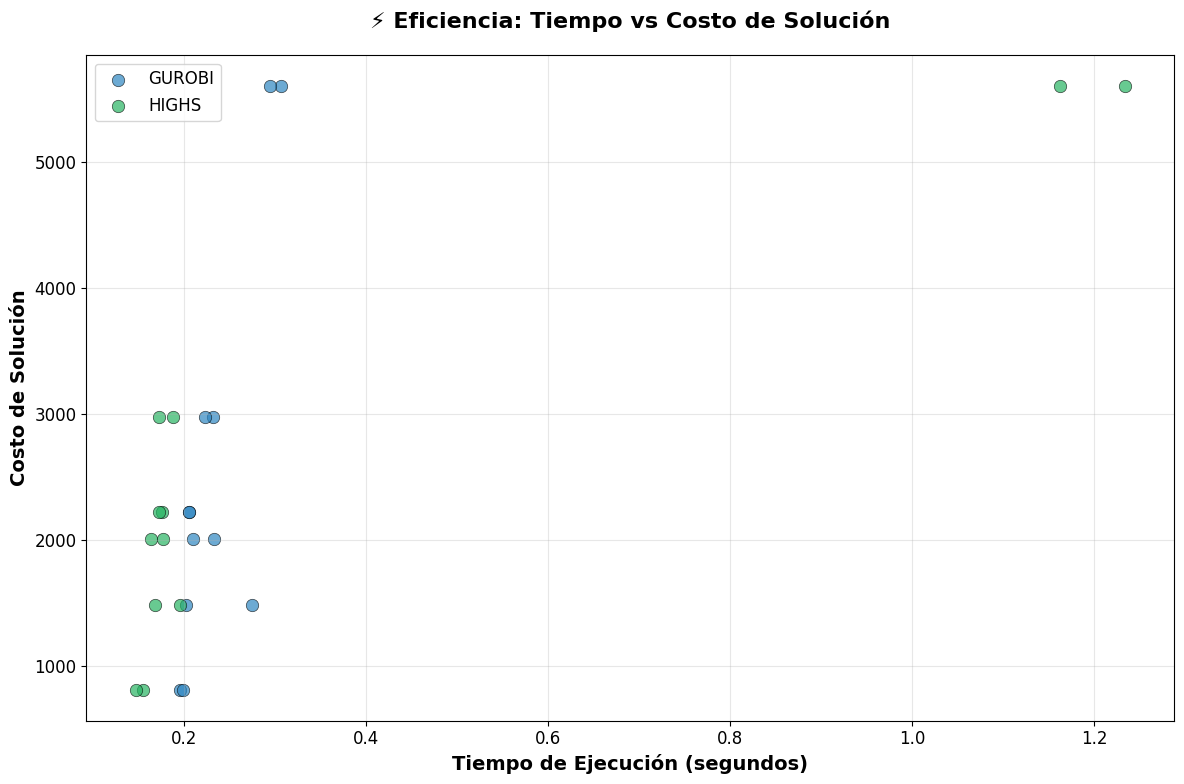

✅ Gráfico 4 completado

⚡ ANÁLISIS DE EFICIENCIA:
(Mejor = Menor tiempo + Menor costo)
  • GUROBI:
    - Tiempo promedio: 0.2317s
    - Costo promedio: 2518
    - Puntuación eficiencia: 2.7500
  • HIGHS:
    - Tiempo promedio: 0.3424s
    - Costo promedio: 2518
    - Puntuación eficiencia: 2.8607


In [ ]:

print(" Generando Gráfico 4: Eficiencia - Tiempo vs Costo")

if len(df_exitosos) > 0:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    colors = {'gurobi': '#2E86C1', 'highs': '#28B463', 'cplex': '#E74C3C'}
    

    for solver in df_exitosos['solver'].unique():
        datos_solver = df_exitosos[df_exitosos['solver'] == solver]
        ax.scatter(datos_solver['tiempo'], datos_solver['costo'], 
                  label=solver.upper(), 
                  alpha=0.7, 
                  s=80, 
                  color=colors.get(solver, '#333333'),
                  edgecolors='black',
                  linewidth=0.5)
    
    ax.set_xlabel('Tiempo de Ejecución (segundos)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Costo de Solución', fontsize=14, fontweight='bold')
    ax.set_title('⚡ Eficiencia: Tiempo vs Costo de Solución', 
                fontsize=16, fontweight='bold', pad=20)
    
    ax.legend(fontsize=12, loc='best')
    ax.grid(True, alpha=0.3)
    
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Gráfico 4 completado")
    
    print(f"\n ANÁLISIS DE EFICIENCIA:")
    print(f"(Mejor = Menor tiempo + Menor costo)")
    
    for solver in df_exitosos['solver'].unique():
        datos = df_exitosos[df_exitosos['solver'] == solver]
        tiempo_prom = datos['tiempo'].mean()
        costo_prom = datos['costo'].mean()
        eficiencia = tiempo_prom + (costo_prom / 1000)  
        print(f"  • {solver.upper()}:")
        print(f"    - Tiempo promedio: {tiempo_prom:.4f}s")
        print(f"    - Costo promedio: {costo_prom:.0f}")
        print(f"    - Puntuación eficiencia: {eficiencia:.4f}")
    
else:
    print(" No hay datos exitosos para análisis de eficiencia")

🎨 Generando gráfico de barras: Instancias vs Tiempo de Ejecución



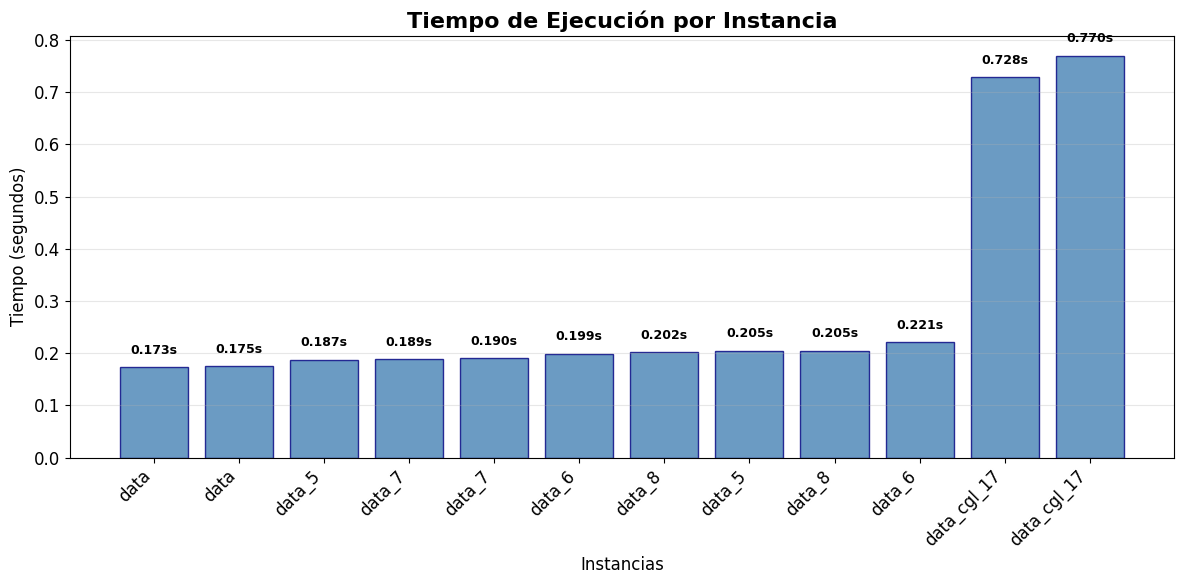

✅ Gráfico completado
📊 Mostrando 12 instancias

📋 TIEMPOS POR INSTANCIA:
  • data_corregido.dat: 0.1729 segundos
  • data.dat: 0.1754 segundos
  • data_5.dat: 0.1871 segundos
  • data_7_corregido.dat: 0.1889 segundos
  • data_7.dat: 0.1903 segundos
  • data_6.dat: 0.1987 segundos
  • data_8.dat: 0.2021 segundos
  • data_5_corregido.dat: 0.2048 segundos
  • data_8_corregido.dat: 0.2050 segundos
  • data_6_corregido.dat: 0.2211 segundos
  • data_cgl_17_corregido.dat: 0.7285 segundos
  • data_cgl_17.dat: 0.7697 segundos


In [ ]:

print("🎨 Generando gráfico de barras: Instancias vs Tiempo de Ejecución")

df_exitosos = df[df['estado'].isin(['solved', 'optimal'])].copy()

if len(df_exitosos) > 0:
    tiempos_por_instancia = df_exitosos.groupby('archivo')['tiempo'].mean().sort_values()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    

    bars = ax.bar(range(len(tiempos_por_instancia)), 
                  tiempos_por_instancia.values,
                  color='steelblue', 
                  alpha=0.8,
                  edgecolor='navy',
                  linewidth=1)
    
  
    ax.set_title('Tiempo de Ejecución por Instancia', 
                fontsize=16, fontweight='bold')
    ax.set_xlabel('Instancias', fontsize=12)
    ax.set_ylabel('Tiempo (segundos)', fontsize=12)
    

    ax.set_xticks(range(len(tiempos_por_instancia)))
    ax.set_xticklabels([nombre.replace('.dat', '').replace('_corregido', '') 
                       for nombre in tiempos_por_instancia.index], 
                       rotation=45, ha='right')
    
    for bar, valor in zip(bars, tiempos_por_instancia.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
                f'{valor:.3f}s', ha='center', va='bottom', 
                fontsize=9, fontweight='bold')
    
    
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print(f" Gráfico completado")
    print(f" Mostrando {len(tiempos_por_instancia)} instancias")
    

    print(f"\n TIEMPOS POR INSTANCIA:")
    for instancia, tiempo in tiempos_por_instancia.items():
        print(f"  • {instancia}: {tiempo:.4f} segundos")
        
else:
    print(" No hay datos para mostrar")

🎨 Generando gráfico de barras: Instancias vs Número de Nodos


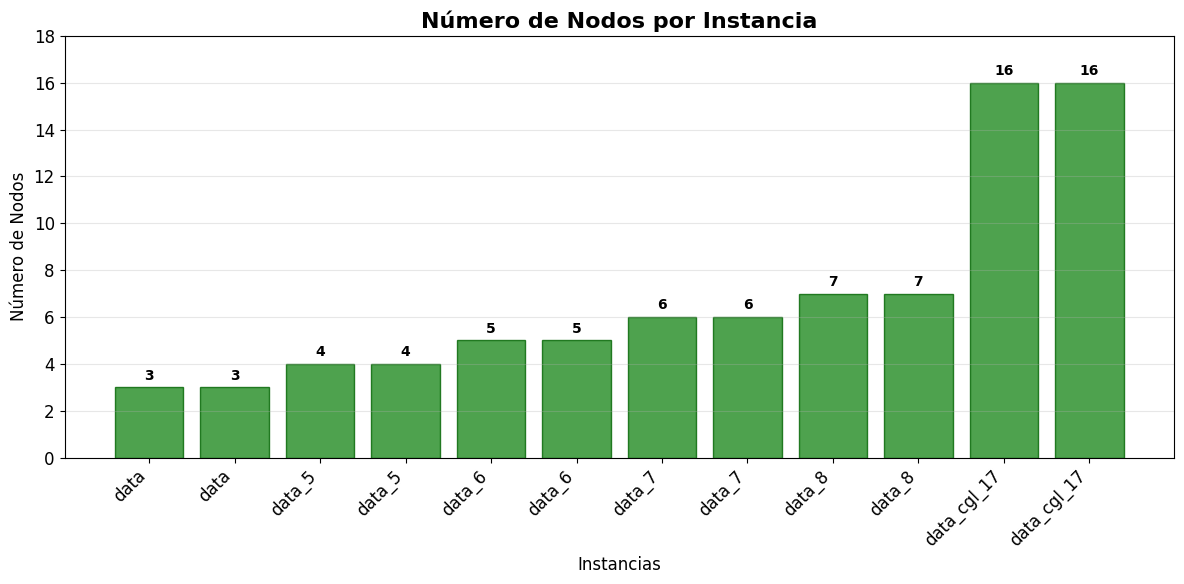

✅ Gráfico de nodos completado
📊 Mostrando 12 instancias

🔢 NÚMERO DE NODOS POR INSTANCIA:
  • data.dat: 3 nodos
  • data_corregido.dat: 3 nodos
  • data_5_corregido.dat: 4 nodos
  • data_5.dat: 4 nodos
  • data_6_corregido.dat: 5 nodos
  • data_6.dat: 5 nodos
  • data_7_corregido.dat: 6 nodos
  • data_7.dat: 6 nodos
  • data_8.dat: 7 nodos
  • data_8_corregido.dat: 7 nodos
  • data_cgl_17.dat: 16 nodos
  • data_cgl_17_corregido.dat: 16 nodos


In [ ]:

print("🎨 Generando gráfico de barras: Instancias vs Número de Nodos")

if len(df_exitosos) > 0:
    nodos_por_instancia = df_exitosos.groupby('archivo')['num_arcos'].mean().sort_values()
    

    fig, ax = plt.subplots(figsize=(12, 6))
    
    
    bars = ax.bar(range(len(nodos_por_instancia)), 
                  nodos_por_instancia.values,
                  color='forestgreen', 
                  alpha=0.8,
                  edgecolor='darkgreen',
                  linewidth=1)
    
  
    ax.set_title('Número de Nodos por Instancia', 
                fontsize=16, fontweight='bold')
    ax.set_xlabel('Instancias', fontsize=12)
    ax.set_ylabel('Número de Nodos', fontsize=12)
   
    ax.set_xticks(range(len(nodos_por_instancia)))
    ax.set_xticklabels([nombre.replace('.dat', '').replace('_corregido', '') 
                       for nombre in nodos_por_instancia.index], 
                       rotation=45, ha='right')
    

    for bar, valor in zip(bars, nodos_por_instancia.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.2,
                f'{int(valor)}', ha='center', va='bottom', 
                fontsize=10, fontweight='bold')
    
  
    ax.grid(True, alpha=0.3, axis='y')
    

    ax.set_ylim(0, max(nodos_por_instancia.values) + 2)
    
    plt.tight_layout()
    plt.show()
    
    print(f" Gráfico de nodos completado")
    print(f" Mostrando {len(nodos_por_instancia)} instancias")
    

    print(f"\n NÚMERO DE NODOS POR INSTANCIA:")
    for instancia, nodos in nodos_por_instancia.items():
        print(f"  • {instancia}: {int(nodos)} nodos")
        
else:
    print(" No hay datos para mostrar")

🎨 Generando gráfico combinado: Relación entre Nodos y Tiempo


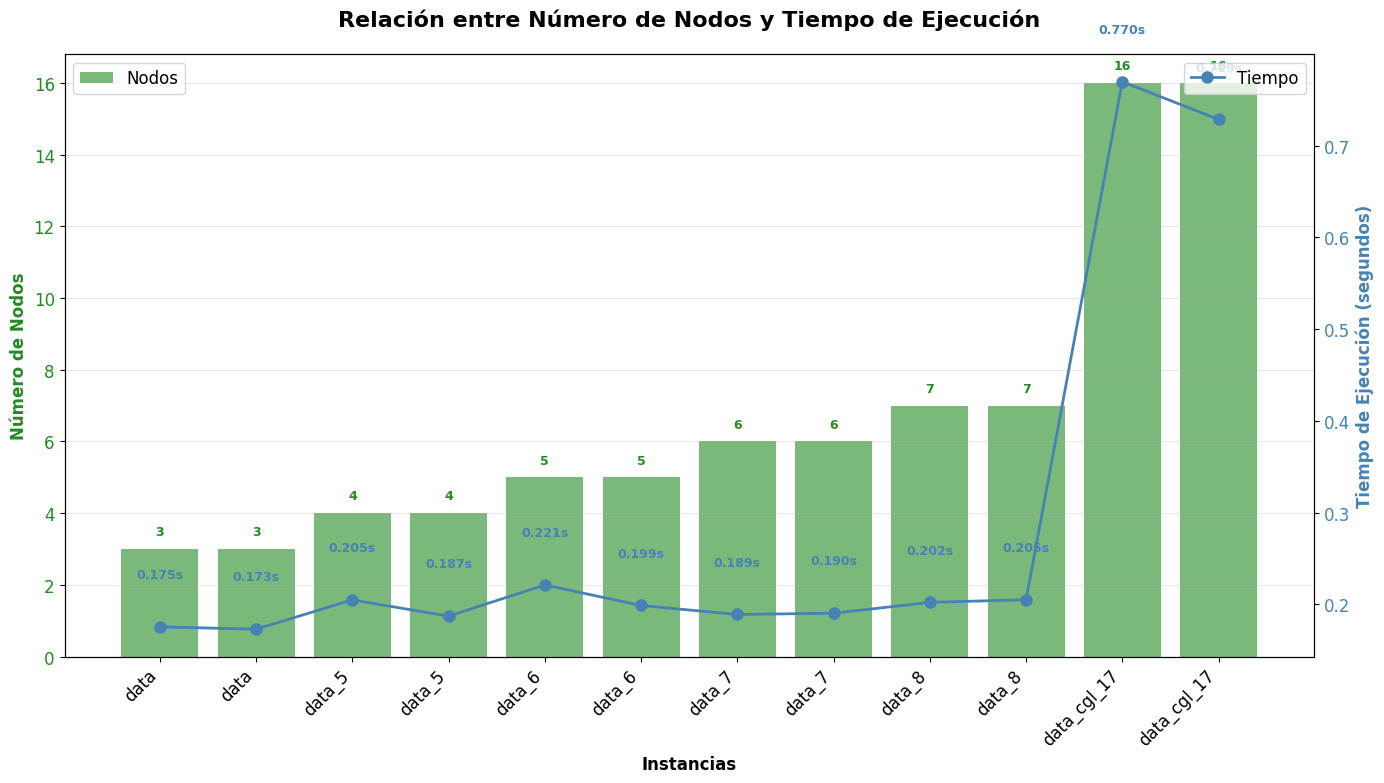

✅ Gráfico combinado completado

📈 ANÁLISIS DE CORRELACIÓN:
  • Correlación Nodos-Tiempo: 0.961
    → Correlación fuerte positiva: A más nodos, más tiempo


In [ ]:

print(" Generando gráfico combinado: Relación entre Nodos y Tiempo")

if len(df_exitosos) > 0:
    datos_combinados = df_exitosos.groupby('archivo').agg({
        'num_arcos': 'mean',
        'tiempo': 'mean'  
    }).round(4)
    
    datos_combinados = datos_combinados.sort_values('num_arcos')
    
    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    color1 = 'forestgreen'
    ax1.set_xlabel('Instancias', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Número de Nodos', color=color1, fontsize=12, fontweight='bold')
    
    bars = ax1.bar(range(len(datos_combinados)), 
                   datos_combinados['num_arcos'].values,
                   color=color1, alpha=0.6, label='Nodos')
    
    ax1.tick_params(axis='y', labelcolor=color1)
    
    ax2 = ax1.twinx()
    color2 = 'steelblue'
    ax2.set_ylabel('Tiempo de Ejecución (segundos)', color=color2, fontsize=12, fontweight='bold')
    
    line = ax2.plot(range(len(datos_combinados)), 
                    datos_combinados['tiempo'].values, 
                    color=color2, marker='o', linewidth=2, 
                    markersize=8, label='Tiempo')
    
    ax2.tick_params(axis='y', labelcolor=color2)
 
    ax1.set_title('Relación entre Número de Nodos y Tiempo de Ejecución', 
                  fontsize=16, fontweight='bold', pad=20)
    
   
    ax1.set_xticks(range(len(datos_combinados)))
    ax1.set_xticklabels([nombre.replace('.dat', '').replace('_corregido', '') 
                        for nombre in datos_combinados.index], 
                        rotation=45, ha='right')
    
   
    for i, (nodos, tiempo) in enumerate(zip(datos_combinados['num_arcos'], datos_combinados['tiempo'])):
    
        ax1.text(i, nodos + 0.3, f'{int(nodos)}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold', color=color1)
    
        ax2.text(i, tiempo + 0.05, f'{tiempo:.3f}s', 
                ha='center', va='bottom', fontsize=9, fontweight='bold', color=color2)
    
 
    ax1.grid(True, alpha=0.3, axis='y')
    

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    print(f" Gráfico combinado completado")
    
    import numpy as np
    correlacion = np.corrcoef(datos_combinados['num_arcos'], datos_combinados['tiempo'])[0,1]
    print(f"\n ANÁLISIS DE CORRELACIÓN:")
    print(f"  • Correlación Nodos-Tiempo: {correlacion:.3f}")
    if correlacion > 0.7:
        print(f"    → Correlación fuerte positiva: A más nodos, más tiempo")
    elif correlacion > 0.3:
        print(f"    → Correlación moderada positiva")
    else:
        print(f"    → Correlación débil o negativa")
        
else:
    print(" No hay datos para mostrar")

🎨 Generando representación visual de nodos y arcos por instancia


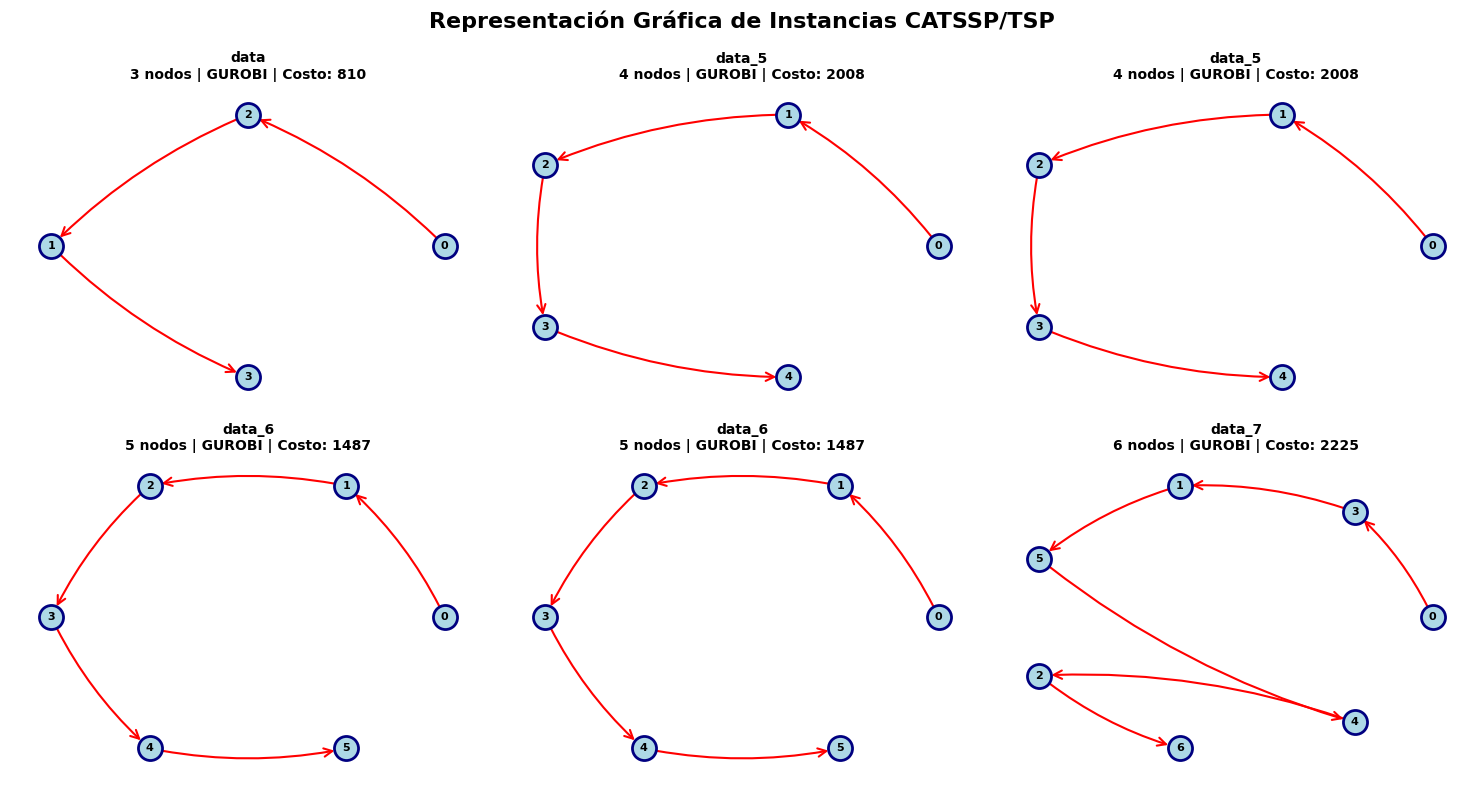

✅ Representación gráfica completada
📊 Mostrando 6 instancias de 12 totales

🔗 DETALLES DE INSTANCIAS MOSTRADAS:
  • data.dat:
    - Nodos: 3
    - Solver: GUROBI
    - Costo: 810
    - Tiempo: 0.1956s
  • data_5.dat:
    - Nodos: 4
    - Solver: GUROBI
    - Costo: 2008
    - Tiempo: 0.2102s
  • data_5_corregido.dat:
    - Nodos: 4
    - Solver: GUROBI
    - Costo: 2008
    - Tiempo: 0.2331s
  • data_6.dat:
    - Nodos: 5
    - Solver: GUROBI
    - Costo: 1487
    - Tiempo: 0.2018s
  • data_6_corregido.dat:
    - Nodos: 5
    - Solver: GUROBI
    - Costo: 1487
    - Tiempo: 0.2745s
  • data_7.dat:
    - Nodos: 6
    - Solver: GUROBI
    - Costo: 2225
    - Tiempo: 0.2053s


In [ ]:

print(" Generando representación visual de nodos y arcos por instancia")

import ast
import networkx as nx

if len(df_exitosos) > 0:
    instancias_unicas = df_exitosos.groupby('archivo').first().reset_index()
    

    instancias_mostrar = instancias_unicas.head(6)
    
    
    n_instancias = len(instancias_mostrar)
    cols = 3 
    rows = (n_instancias + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
    
    
    if rows == 1:
        axes = [axes] if cols == 1 else axes
    if cols == 1:
        axes = [[ax] for ax in axes]
    
    for idx, (_, instancia) in enumerate(instancias_mostrar.iterrows()):
        row = idx // cols
        col = idx % cols
        ax = axes[row][col] if rows > 1 else axes[col]
        
        
        archivo = instancia['archivo']
        arcos_str = instancia['arcos']
        num_nodos = int(instancia['num_arcos'])
        costo = instancia['costo']
        solver = instancia['solver']
        
        
        try:
            arcos = ast.literal_eval(arcos_str)
        except:
            arcos = []
        
        if arcos:
            G = nx.DiGraph() 
            
            for origen, destino in arcos:
                G.add_edge(origen, destino)
            

            if len(G.nodes()) <= 10:
                pos = nx.circular_layout(G, scale=1)
            else:
                pos = nx.spring_layout(G, k=1, iterations=50)
            

            nx.draw_networkx_nodes(G, pos, ax=ax, 
                                 node_color='lightblue', 
                                 node_size=300,
                                 edgecolors='navy',
                                 linewidths=2)
            
          
            nx.draw_networkx_edges(G, pos, ax=ax,
                                 edge_color='red',
                                 arrows=True,
                                 arrowsize=15,
                                 arrowstyle='->',
                                 width=1.5,
                                 connectionstyle="arc3,rad=0.1")
        
            nx.draw_networkx_labels(G, pos, ax=ax,
                                  font_size=8,
                                  font_weight='bold')
            
    
            nombre_limpio = archivo.replace('.dat', '').replace('_corregido', '')
            ax.set_title(f'{nombre_limpio}\n{num_nodos} nodos | {solver.upper()} | Costo: {costo:.0f}',
                        fontsize=10, fontweight='bold')
            
        else:
            ax.text(0.5, 0.5, 'Sin datos\nde arcos', 
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=12, fontweight='bold')
            ax.set_title(f'{archivo}', fontsize=10)
        
        ax.set_axis_off()

    for idx in range(n_instancias, rows * cols):
        row = idx // cols
        col = idx % cols
        if rows > 1:
            axes[row][col].set_visible(False)
        else:
            if cols > 1:
                axes[col].set_visible(False)
    
    plt.suptitle('Representación Gráfica de Instancias CATSSP/TSP', 
                fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    print(f" Representación gráfica completada")
    print(f" Mostrando {len(instancias_mostrar)} instancias de {len(instancias_unicas)} totales")
    
    print(f"\n DETALLES DE INSTANCIAS MOSTRADAS:")
    for _, instancia in instancias_mostrar.iterrows():
        archivo = instancia['archivo']
        num_nodos = int(instancia['num_arcos'])
        solver = instancia['solver']
        costo = instancia['costo']
        tiempo = instancia['tiempo']
        
        print(f"  • {archivo}:")
        print(f"    - Nodos: {num_nodos}")
        print(f"    - Solver: {solver.upper()}")
        print(f"    - Costo: {costo:.0f}")
        print(f"    - Tiempo: {tiempo:.4f}s")
        
else:
    print("❌ No hay datos para mostrar")